Htet Khant Linn

Feb 23, 2026

Week 4

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Importing Retail Sales Data

In [3]:
df = pd.read_csv('data/retail_sales.csv', parse_dates=['ds'], index_col=['ds'])

In [4]:
print(df.info())
print(df.head())

<class 'pandas.DataFrame'>
DatetimeIndex: 293 entries, 1992-01-01 to 2016-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       293 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB
None
                 y
ds                
1992-01-01  146376
1992-02-01  147079
1992-03-01  159336
1992-04-01  163669
1992-05-01  170068


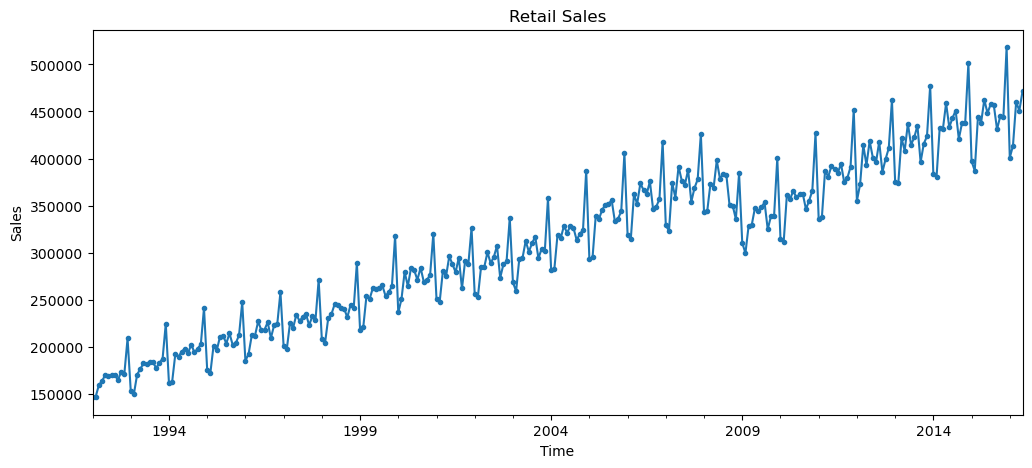

In [44]:
df.y.plot(marker= '.', figsize=(12, 5))
plt.title('Retail Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.savefig('output/retail_sales.png')

plt.show()

## Calculating 3-MA

In [7]:
window_size = 3
ma_3 = df.rolling(
    window = window_size,
    center=True
).mean()

ma_3.rename(columns={'y':'3-MA'}, inplace=True)

In [8]:
print(ma_3.head())

                     3-MA
ds                       
1992-01-01            NaN
1992-02-01  150930.333333
1992-03-01  156694.666667
1992-04-01  164357.666667
1992-05-01  167466.666667


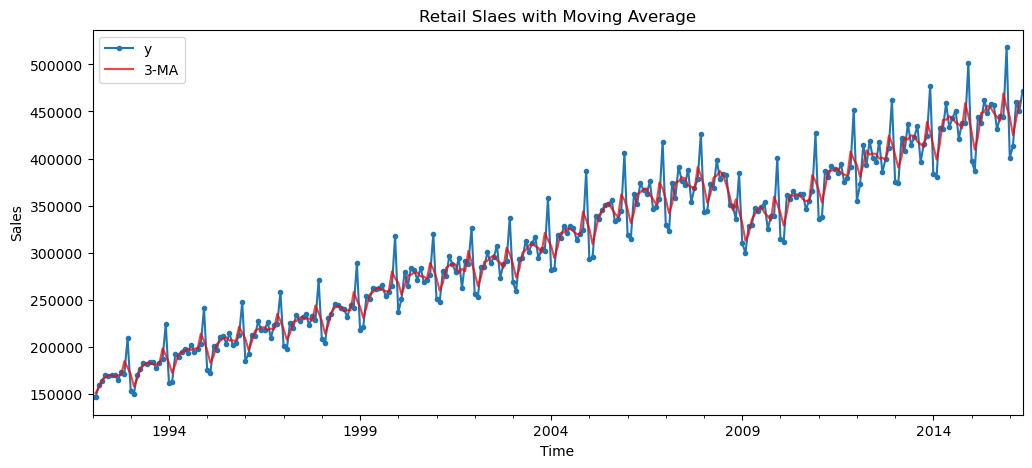

In [18]:
fig, ax = plt.subplots(figsize = [12, 5])
df.plot(ax=ax, marker='.')
ma_3.plot(ax=ax, color='r', alpha=0.75)
ax.set_title('Retail Slaes with Moving Average')
ax.set_xlabel("Time")
ax.set_ylabel("Sales")
plt.savefig('output/retail_sales_with_moving_average.png')

plt.show()

## Calculating 4-MA

In [35]:
df_ = df.copy()

df_["4_ma"] = df_.rolling(window=4).mean()
df_["2x4_ma"] = df_["4_ma"].rolling(window=2).mean()
df_["result"] = df_["2x4_ma"].shift(-2)

## Moving Average - Order of 12 or One Year Period

In [39]:
window_size_12 = 12

ma_2_12 = (
    df.rolling(window=window_size_12)
    .mean()
    .rolling(2)
    .mean()
    .shift(-window_size_12//2)
)

ma_2_12.rename(columns={'y':'ma_2_12'}, inplace=True)

In [40]:
ma_2_12.head()

,ma_2_12
ds,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN


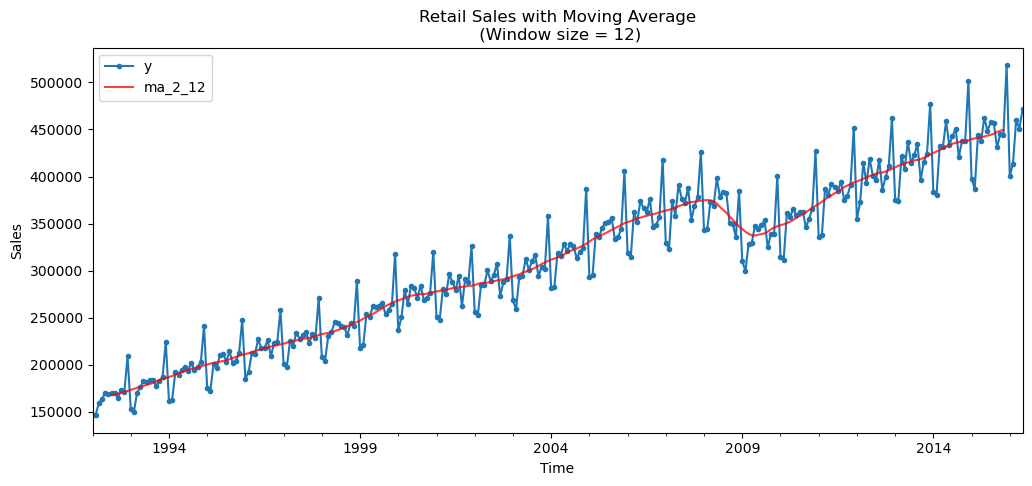

In [43]:
fig, ax = plt.subplots(figsize=[12,5])
df.plot(ax=ax, marker='.')
ma_2_12.plot(ax=ax, color='r', alpha=0.75)

ax.set_title("Retail Sales with Moving Average\n (Window size = 12)")
ax.set_xlabel("Time")
ax.set_ylabel("Sales")
plt.savefig("output/retail_sales_with_12_ma.png")

plt.show()

## Calculating Trends and Seasonality

In [ ]:
# Library Insatllation
# from statsmodels.tsa.seasonal import seasonal_decompose